## Data Exploration and Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function to read and load the dataset
def load_data(file_path):
    """
    Load the dataset from the given file path.
    
    Parameters:
    - file_path (str): Path to the CSV file.
    
    Returns:
    - DataFrame: Loaded dataset.
    """
    data = pd.read_csv(file_path)
    return data

In [3]:
# Function to explore the dataset
def explore_data(data):
    """
    Explore the dataset and print basic information.
    
    Parameters:
    - data (DataFrame): Input dataset.
    """
    # Display basic information about the dataset
    print("Dataset Information:")
    print(data.info())
    
    # Display summary statistics
    print("\nSummary Statistics:")
    print(data.describe())
    
    # Display the first few rows of the dataset
    print("\nFirst Few Rows:")
    print(data.head())

In [4]:
# Function to handle missing values
def handle_missing_values(data):
    # Identify numeric and categorical columns
    numeric_cols = data.select_dtypes(include=['number']).columns
    categorical_cols = data.select_dtypes(include=['object']).columns

    # Impute missing values for numeric columns with median
    numeric_imputer = SimpleImputer(strategy='median')
    data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

    # Impute missing values for categorical columns with mode
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

    return data

In [5]:
# Define a function to replace outliers with the median
def replace_outliers_with_median_iterative(df):
    while True:
        # Apply the outlier replacement to all numeric columns
        numeric_columns = df.select_dtypes(include=['number']).columns
        outliers_exist = False

        for col in numeric_columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Check if outliers exist
            outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
            if any(outliers_mask):
                outliers_exist = True

                # Replace outliers with the median
                df[col] = df[col].where(~outliers_mask, df[col].median())

        # If no outliers exist, break out of the loop
        if not outliers_exist:
            break

    return df


In [6]:
# Function to encode categorical variables
def label_encode(df):
    label_encoder = LabelEncoder()
    
    categorical_columns = df.select_dtypes(include=['object']).columns

    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

    return df


In [7]:
# see the outliers
def check_outliers(df):
    sns.boxplot(data=df, orient="h")
    plt.show()

In [8]:
def load_clean_split(file_path):
    # Load the dataset
    dataset = load_data(file_path)

    # explore dataset by statsmodels
    explore_data(dataset)

    # Handle missing values (using mean imputation in this example)
    dataset_imputed = handle_missing_values(dataset)

    # Handle outliers 
    print('checking is there any outliers exist')
    check_outliers(dataset_imputed) # plot
    dataset_no_outliers = replace_outliers_with_median_iterative(dataset_imputed)
    print('outliers handeled')
    check_outliers(dataset_no_outliers)

    # Encode categorical variables
    dataset_encoded = label_encode(dataset_no_outliers)

    # Split the data into features and target
    X = dataset_encoded.drop('default', axis=1)
    y = dataset_encoded['default']

    # Split the data into training and testing sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return train_test_split(X, y, test_size=0.2, random_state=42)
    
    # ... Continue with model training using the preprocessed data


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone             

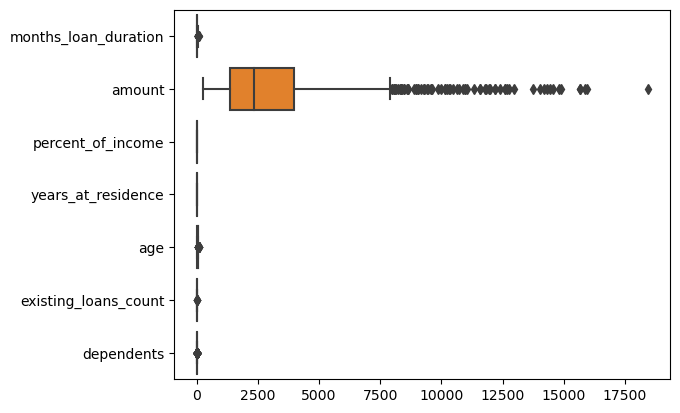

outliers handeled


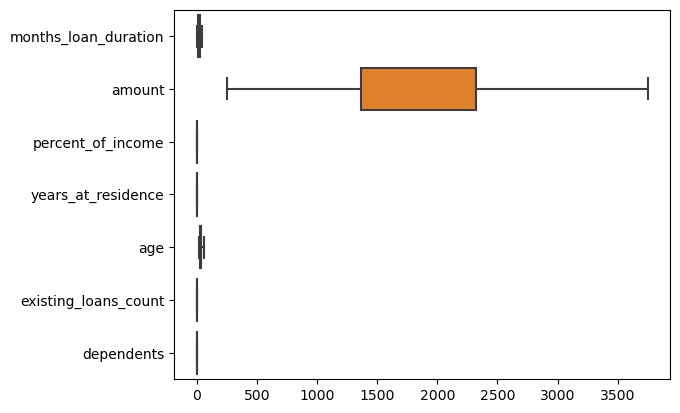

In [9]:
X_train, X_test, y_train, y_test = load_clean_split("./data/German_bank.csv")

In [10]:
%store X_train X_test y_train y_test

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
